In [1]:
import networkx as nx

n = 20
G = nx.complete_graph(n)

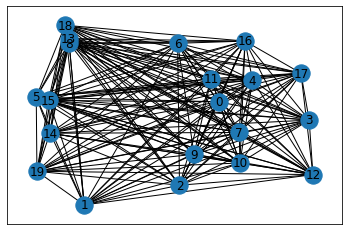

In [2]:
import random

my_pos = { i:(random.random(),random.random()) for i in G.nodes}
nx.draw_networkx(G,my_pos,with_labels=True)

In [3]:
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

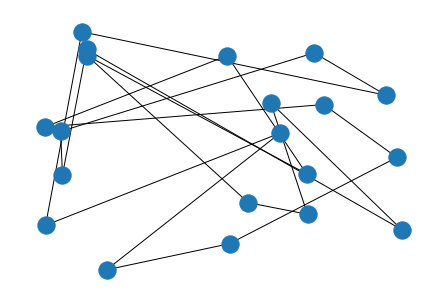

In [4]:
tour = list(G.nodes)
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw( G.edge_subgraph(tour_edges), pos=my_pos)

In [5]:
import matplotlib.pyplot as plt

improved = True

while improved:
    improved = False
    
    for i in range(n):
        for j in range(i+1,n):

            cur1 = (tour[i], tour[i+1])
            cur2 = (tour[j], tour[(j+1)%n])
            cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']

            new1 = (tour[i], tour[j])
            new2 = (tour[i+1], tour[(j+1)%n])
            new_length = G.edges[new1]['length'] + G.edges[new2]['length']

            if new_length < cur_length:
                improved = True
                print('swap edges', cur1,cur2,'with', new1,new2)
                tour[i+1:j+1] = tour[i+1:j+1][::-1]
                tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]

#                 plt.figure()
#                 nx.draw( G.edge_subgraph(tour_edges), pos=my_pos)
        

swap edges (0, 1) (4, 5) with (0, 4) (1, 5)
swap edges (0, 4) (6, 7) with (0, 6) (4, 7)
swap edges (0, 6) (7, 8) with (0, 7) (6, 8)
swap edges (0, 7) (8, 9) with (0, 8) (7, 9)
swap edges (0, 8) (10, 11) with (0, 10) (8, 11)
swap edges (0, 10) (11, 12) with (0, 11) (10, 12)
swap edges (0, 11) (12, 13) with (0, 12) (11, 13)
swap edges (12, 10) (3, 2) with (12, 3) (10, 2)
swap edges (3, 4) (17, 18) with (3, 17) (4, 18)
swap edges (17, 16) (4, 18) with (17, 4) (16, 18)
swap edges (7, 9) (10, 2) with (7, 10) (9, 2)
swap edges (1, 5) (11, 13) with (1, 11) (5, 13)
swap edges (1, 11) (15, 16) with (1, 15) (11, 16)
swap edges (1, 15) (18, 19) with (1, 18) (15, 19)
swap edges (1, 18) (19, 0) with (1, 19) (18, 0)
swap edges (19, 15) (14, 13) with (19, 14) (15, 13)
swap edges (14, 15) (5, 6) with (14, 5) (15, 6)
swap edges (5, 13) (15, 6) with (5, 15) (13, 6)
swap edges (15, 13) (6, 8) with (15, 6) (13, 8)
swap edges (15, 6) (8, 11) with (15, 8) (6, 11)
swap edges (15, 8) (16, 18) with (15, 16) (8

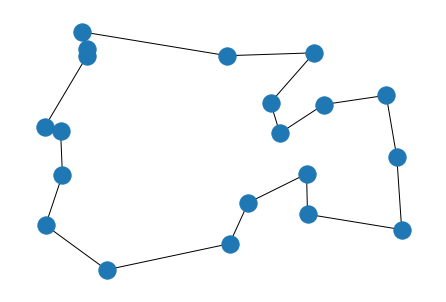

In [6]:
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw( G.edge_subgraph(tour_edges), pos=my_pos)